In [11]:
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline
pd.plotting.register_matplotlib_converters()
import seaborn as sns
sns.set(style="whitegrid")
from sklearn.datasets import make_classification

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import log_loss

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
bank_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/bank.csv',sep=';')
bank_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [105]:
age_y = bank_df[bank_df['y']=='yes']
age_n = bank_df[bank_df['y']=='no']

age_y = age_y.loc[:,['age','duration', 'campaign','euribor3m']]
age_n = age_n.loc[:,['age','duration', 'campaign','euribor3m']]
age_n.head

<bound method NDFrame.head of        age  duration  campaign  euribor3m
0       56       261         1      4.857
1       57       149         1      4.857
2       37       226         1      4.857
3       40       151         1      4.857
4       56       307         1      4.857
...    ...       ...       ...        ...
41180   36       254         2      1.028
41182   29       112         1      1.028
41184   46       383         1      1.028
41185   56       189         2      1.028
41187   74       239         3      1.028

[36548 rows x 4 columns]>

In [15]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [16]:
bank_df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [17]:
#bank = bank_df['age', ]
coll = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
bank_df.drop(coll, axis=1, inplace=True)
bank_df.dtypes

age                 int64
duration            int64
campaign            int64
pdays               int64
previous            int64
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [18]:
bank_df.age.unique()

array([56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55,
       49, 34, 52, 58, 32, 38, 44, 42, 60, 53, 47, 51, 48, 33, 31, 43, 36,
       28, 27, 26, 22, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95,
       77, 68, 75, 63, 80, 62, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81,
       74, 17, 87, 91, 86, 98, 94, 84, 92, 89])

In [19]:
bank_df.duration.unique()

array([ 261,  149,  226, ..., 1246, 1556, 1868])

In [20]:
bank_df.campaign.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 19, 18, 23, 14,
       22, 25, 16, 17, 15, 20, 56, 39, 35, 42, 28, 26, 27, 32, 21, 24, 29,
       31, 30, 41, 37, 40, 33, 34, 43])

In [21]:
bank_df.pdays.unique()

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20])

In [22]:
bank_df['cons.price.idx'].unique()

array([93.994, 94.465, 93.918, 93.444, 93.798, 93.2  , 92.756, 92.843,
       93.075, 92.893, 92.963, 92.469, 92.201, 92.379, 92.431, 92.649,
       92.713, 93.369, 93.749, 93.876, 94.055, 94.215, 94.027, 94.199,
       94.601, 94.767])

In [23]:
bank = bank_df.iloc[0:0, 10:14]
bank

,y


In [57]:
param_y = bank_df.iloc[:, -1]
#bank_df.iloc[:, -1]
param_y = param_y.map(dict(yes=1, no=0))
param_y

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int64

In [25]:
bank_df.iloc[:, :-1]

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6


In [56]:
x = bank_df.iloc[:, :-1]
y = bank_df.iloc[:, -1]
x

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6


Linear Regression

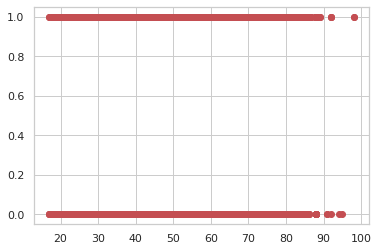

In [59]:
datas = bank_df['age']
#bank_df.plot(kind='scatter', x='previous', y='age')
plt.scatter(datas, param_y, c='r')

In [89]:
l_x = x.age.array.reshape(-1, 1)
l_y = param_y
lm = LinearRegression()
lm.fit(l_x, l_y)

LinearRegression()

In [90]:
z = np.linspace(0, 100, 1000)
z_predict = lm.intercept_ + (lm.coef_ * z)

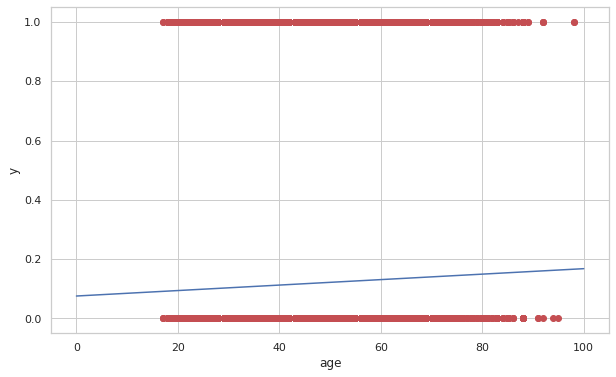

In [91]:
plt.figure(figsize=(10,6))
plt.scatter(l_x, param_y, c='r')
plt.plot(z, z_predict)
plt.ylabel('y')
plt.xlabel("age")
plt.show()

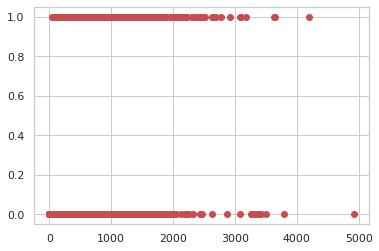

In [115]:
datas = bank_df['duration']
plt.scatter(datas, param_y, c='r')

In [93]:
l_x = x.duration.array.reshape(-1, 1)
l_y = param_y
lm = LinearRegression()
lm.fit(l_x, l_y)

LinearRegression()

In [114]:
z = np.linspace(0, 5000, 1000)
z_predict = lm.intercept_ + (lm.coef_ * z)

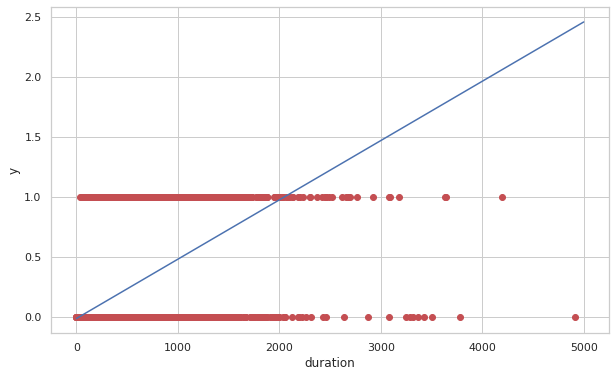

In [113]:
plt.figure(figsize=(10,6))
plt.scatter(l_x, l_y, c='r')
plt.plot(z, z_predict)
plt.ylabel('y')
plt.xlabel("duration")
plt.show()

Univariate

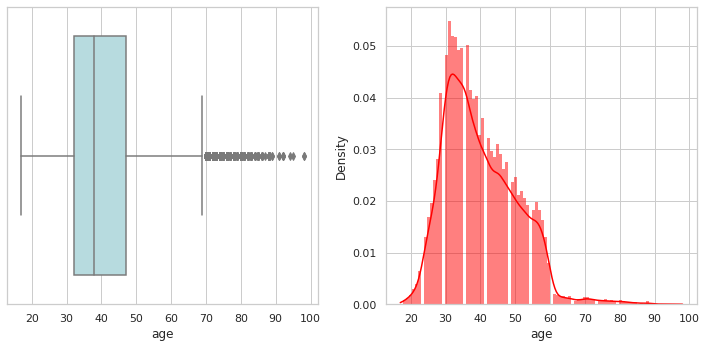

In [96]:
f,axes=plt.subplots(ncols=2,figsize=(10,5),sharex=True)
sns.boxplot(x = bank_df.loc[:,'age'], ax=axes[0], color='powderblue')
sns.histplot(data= bank_df.loc[:,'age'], color="red", kde=True, stat="density", linewidth=0, ax=axes[1])  
plt.tight_layout()

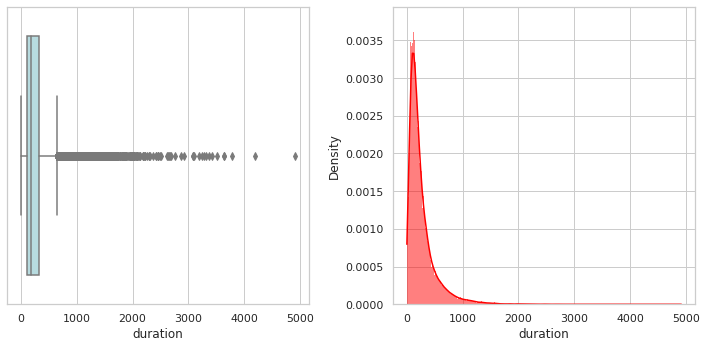

In [97]:
f,axes=plt.subplots(ncols=2,figsize=(10,5),sharex=True)
sns.boxplot(x = bank_df.loc[:,'duration'], ax=axes[0], color='powderblue')
sns.histplot(data= bank_df.loc[:,'duration'], color="red", kde=True, stat="density", linewidth=0, ax=axes[1])  
plt.tight_layout()

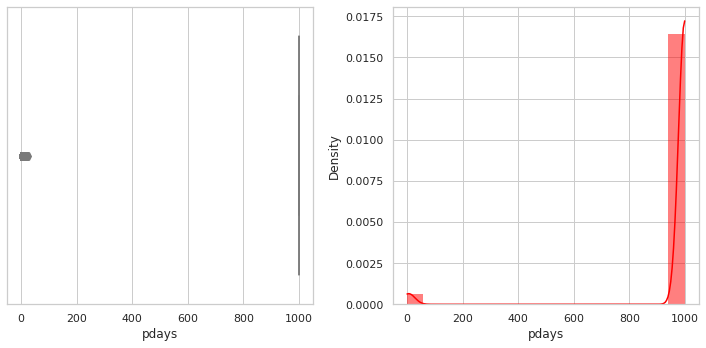

In [98]:
f,axes=plt.subplots(ncols=2,figsize=(10,5),sharex=True)
sns.boxplot(x = bank_df.loc[:,'pdays'], ax=axes[0], color='powderblue')
sns.histplot(data= bank_df.loc[:,'pdays'], color="red", kde=True, stat="density", linewidth=0, ax=axes[1])  
plt.tight_layout()

Bivariate

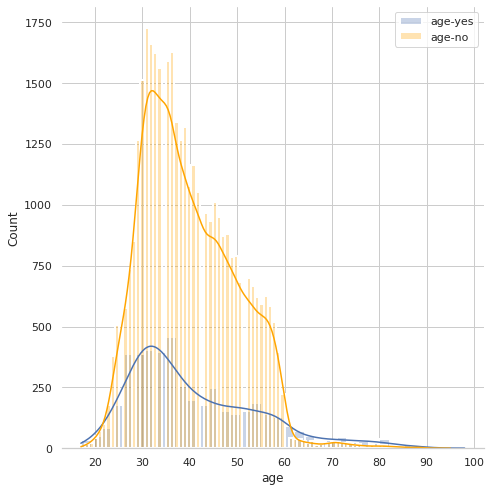

In [99]:
f, axes = plt.subplots(ncols = 1,figsize=(7, 7), sharex=True)
sns.despine(left=True)  #sepal_length-vs-class

# Ploting the histogram with KDE

sns.histplot(data=age_y["age"],label="age-yes",color='b',kde=True,linewidth=2,alpha=0.3)
sns.histplot(data=age_n["age"],label="age-no",kde=True,color='orange',linewidth=2,alpha=0.3)

plt.legend()
plt.tight_layout()

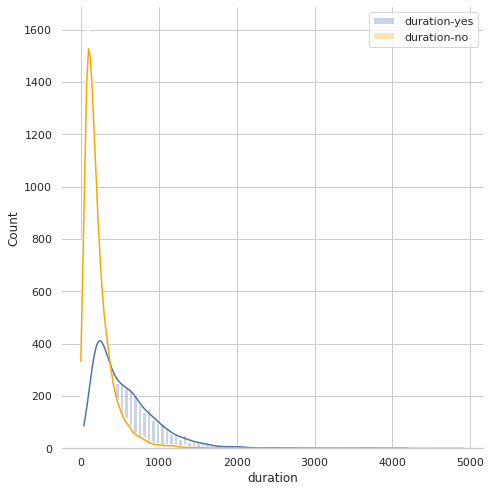

In [100]:
f, axes = plt.subplots(ncols = 1,figsize=(7, 7), sharex=True)
sns.despine(left=True)  #sepal_length-vs-class

# Ploting the histogram with KDE

sns.histplot(data=age_y["duration"],label="duration-yes",color='b',kde=True,linewidth=2,alpha=0.3)
sns.histplot(data=age_n["duration"],label="duration-no",kde=True,color='orange',linewidth=2,alpha=0.3)

plt.legend()
plt.tight_layout()

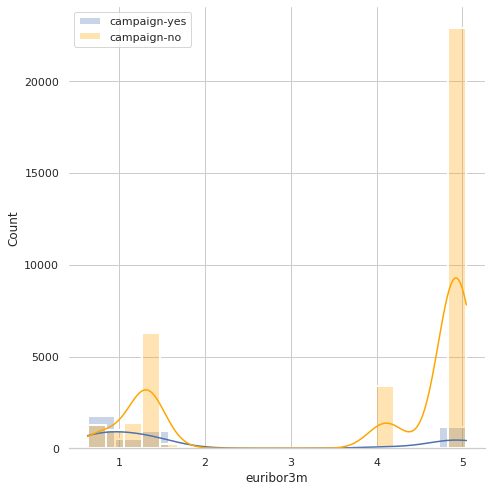

In [106]:
f, axes = plt.subplots(ncols = 1,figsize=(7, 7), sharex=True)
sns.despine(left=True)  #sepal_length-vs-class

# Ploting the histogram with KDE

sns.histplot(data=age_y["euribor3m"],label="campaign-yes",color='b',kde=True,linewidth=2,alpha=0.3)
sns.histplot(data=age_n["euribor3m"],label="campaign-no",kde=True,color='orange',linewidth=2,alpha=0.3)

plt.legend()
plt.tight_layout()

In [40]:
tes = x.iloc[3000:3005]
tes
#y[3000:3005]

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
3000,35,402,1,999,0,1.1,93.994,-36.4,4.859,5191.0
3001,54,252,2,999,0,1.1,93.994,-36.4,4.859,5191.0
3002,36,360,2,999,0,1.1,93.994,-36.4,4.859,5191.0
3003,26,852,2,999,0,1.1,93.994,-36.4,4.859,5191.0
3004,27,241,2,999,0,1.1,93.994,-36.4,4.859,5191.0


In [41]:
dat = [[40, 510, 2, 888, 0, -1.1, 93.432, -32.3, 4.999, 5100],
       [31, 200, 1, 45, 0, 1.1, 94.111, 36.1, 4.234, 4500],
       [23, 235, 2, 41, 1, 1.1, 89.352, 42.5, 2.532, 5364]]
dfs = pd.DataFrame(dat, columns =['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'])

In [42]:
logistic_regressor = LogisticRegression(max_iter=1000, penalty='elasticnet', solver='saga', l1_ratio=0.5)
pipeline = Pipeline(steps=[('add_poly_features', PolynomialFeatures()),
                           ('logistic_regression', logistic_regressor)])

In [43]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.3)

In [44]:
pipeline.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Pipeline(steps=[('add_poly_features', PolynomialFeatures()),
                ('logistic_regression',
                 LogisticRegression(l1_ratio=0.5, max_iter=1000,
                                    penalty='elasticnet', solver='saga'))])

In [45]:
y_pred = pipeline.predict(X_test)
y_pred

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [46]:
y_test

1799     no
11771    no
13912    no
37311    no
8210     no
         ..
10434    no
4008     no
15870    no
4925     no
16293    no
Name: y, Length: 12357, dtype: object

[[10740   257]
 [  843   517]]


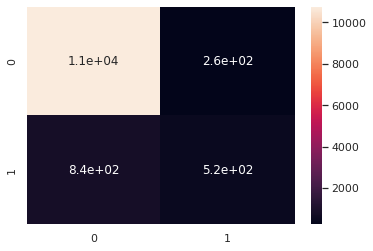

In [111]:
# Applying confusion matrix on above data
a = confusion_matrix(y_test,y_pred)
print(a)
sns.heatmap(a, annot=True)

In [48]:
precision_score(y_test,y_pred, average="binary", pos_label="no")

0.9272209272209272

In [49]:
recall_score(y_test,y_pred, average="binary", pos_label="no")

0.976629989997272

In [50]:
f1_score(y_test,y_pred, average="binary", pos_label="no")

0.9512843224092117

test

In [51]:
tes_pred = pipeline.predict(dfs)
tes_pred

array(['no', 'yes', 'no'], dtype=object)